### Step 1: Import libraries and CSV File


In [1]:
# Import the required libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file into a Pandas DataFrame
car_prices_df = pd.read_csv(Path("Resources/car_prices.csv"))

# Review the DataFrame
car_prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
# Check for Null Values
car_prices_df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [4]:
car_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
# Separate the data into target and features

# Separate the y variable, the target
y = car_prices_df["sellingprice"]

# Separate the X variable, the features
X = car_prices_df.drop(columns="sellingprice")

In [6]:
# Create a distribution plot for target variable 'sellingprice'
#sns.distplot(car_prices_df['sellingprice']);

# print 'Skewness' and 'Kurtosis'
#print("Skewness: %f" % car_prices_df['sellingprice'].skew())
#print("Kurtosis: %f" % car_prices_df['sellingprice'].kurt())

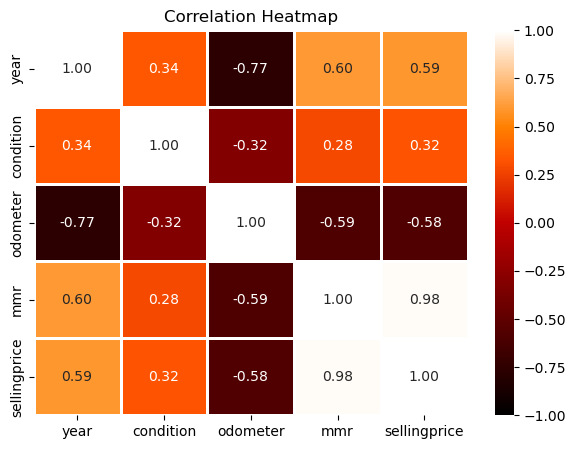

In [7]:
plt.figure(figsize=(7, 5))
sns.heatmap(car_prices_df.corr(), annot=True, fmt='.2f', cmap='gist_heat', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.show()

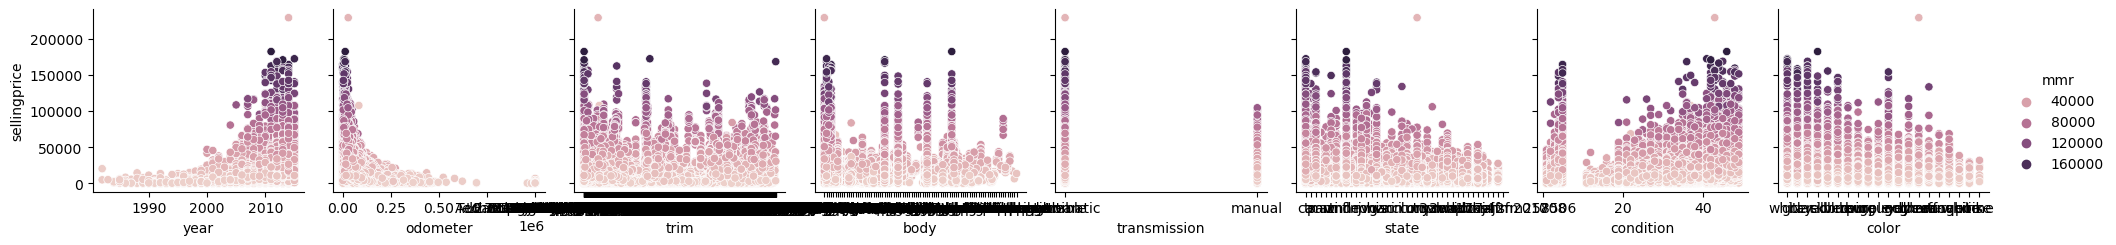

In [8]:
x_vars= ["year", "odometer", "trim", "body", "transmission","state", "condition", "color"]
y_vars= ["sellingprice"]
g= sns.PairGrid(car_prices_df, hue="mmr", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend();

In [ ]:
#x_vars= ["year", "odometer", "trim", "body", "transmission","state", "condition", "color"]
#y_vars= ["sellingprice"]
#g= sns.PairGrid(car_prices_df, hue="", x_vars=x_vars, y_vars=y_vars)
#g.map_diag(sns.histplot, color=".3")
#g.map_offdiag(sns.scatterplot)
#g.add_legend();

In [ ]:
car_prices_df["make"].value_counts()

In [ ]:
#non_luxury_cars['luxury_category'] = ["Kia", "Volvo", "Nissan", "Chevrolet", "Ford", "Hyundai", "Buick", "Acura", "jeep",
                #  "Mitsubishi", "Mazda", "Volkswagen", "Toyota", "Subaru", "Scion", "Dodge", "FIAT", 
                #  "Chrysler", "ford", "Honda", "GMC", "mitsubishi", "smart", "Ram", "chevrolet", "pontiac",
                 # "pontiac", "chrysler", "Saturn", "Mercury", "mazda", "toyota", "gmc truck", "honda", "nissan",
                #  "Saab", "Suzuki", "dodge", "subaru", "Oldsmobile", "oldsmobile", "hyundai", "jeep", "Isuzu", 
                #  "dodge tk", "Geo", "acura", "volskwagen", "suzuki", "kia", "gmc", "mazda tk", "vw", "Daewoo",
                #  "chev truck", "ford tk", "plymouth", "plymouth", "ford tuck", "airstream", "dot"]
#luxury_cars['luxury_category'] = ["BMW", "Audi", "Cadillac", "Lexus", "Mercedes-Benz", "Lexus", "Infiniti", 
                  # "Landrover", "MINI", "Lincoln", "lincoln", "Jaguar", "porsche", "Ferrari", 
                 #  "Bentley", "Maserati", "HUMMER", "Rolls-Royce", "Tesla", "Aston Martin", 
                 #  "Lamborghini", "Fisker", "Lotus", "bmw", "maserati", "landrover", "cadillac", 
                  # "mercedes", "lexus", "porsche", "mercedes-b"]

In [12]:
#luxury_cars['luxury_category'] = 'Luxury'
#non_luxury_cars['luxury_category'] = 'Non-Luxury'

# Concatenate the DataFrames
#combined_df = pd.concat([luxury_cars, non_luxury_cars])

# Create two separate FacetGrids for luxury and non-luxury cars
#luxury_grid = sns.FacetGrid(combined_df[combined_df['luxury_category'] == 'Luxury'], hue="make")
#luxury_grid.map(sns.scatterplot, "odometer", "sellingprice", alpha=.7)
#luxury_grid.add_legend()
#luxury_grid.set(title="Luxury Cars")

#non_luxury_grid = sns.FacetGrid(combined_df[combined_df['luxury_category'] == 'Non-Luxury'], hue="make")
#non_luxury_grid.map(sns.scatterplot, "odometer", "sellingprice", alpha=.7)
#non_luxury_grid.add_legend()
#non_luxury_grid.set(title="Non-Luxury Cars")

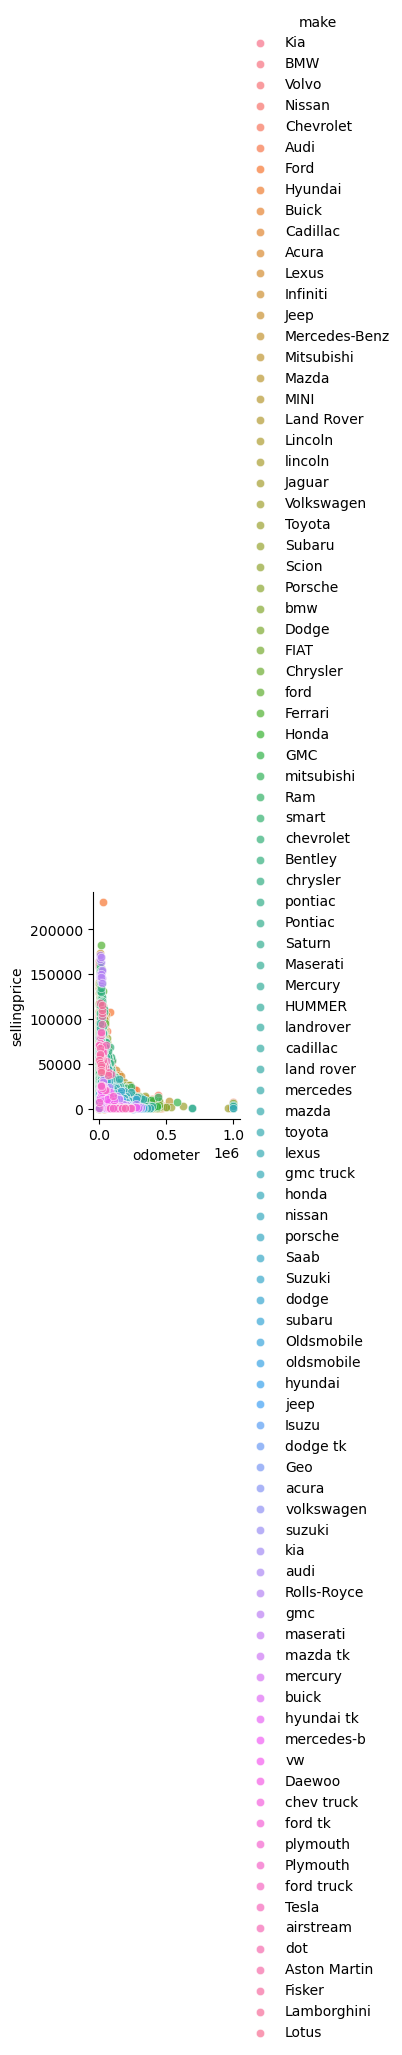

In [13]:
g = sns.FacetGrid(car_prices_df, hue="make")
g.map(sns.scatterplot, "odometer", "sellingprice", alpha=.7)
g.add_legend()
plt.show()


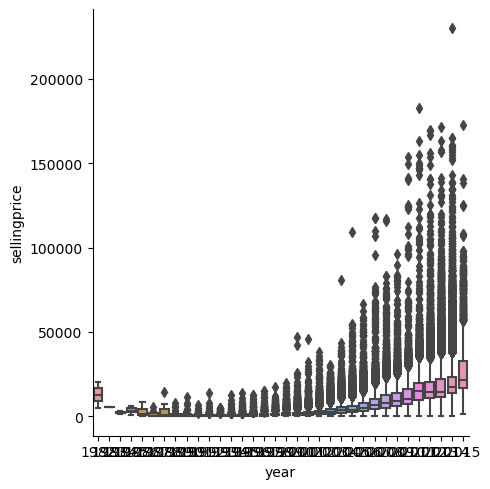

In [14]:
sns.catplot(data=car_prices_df, x="year", y="sellingprice", kind="box")
plt.show;

In [15]:
#make_pp= car_prices_df.make.value_counts()[:10]
#make_pp.index

In [16]:
#tencar_df.make.value_counts() , tencar_df.shape

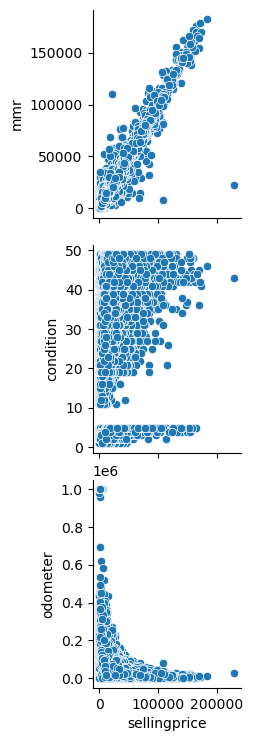

In [17]:
# Create a pairplot using Seaborn
sns.pairplot(car_prices_df, x_vars=["sellingprice"], y_vars=["mmr", "condition", "odometer"])

# Display the pairplot
plt.show()

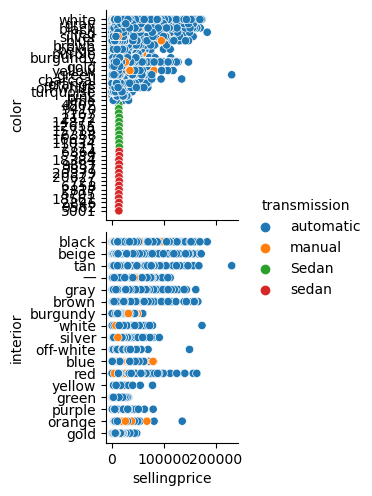

In [18]:
# Create a pairplot using the variables "interior" and "color" using Seaborn
sns.pairplot(car_prices_df, x_vars=["sellingprice"], y_vars=["color", "interior"], hue="transmission", markers="o")

#Display the pairplot
plt.show()

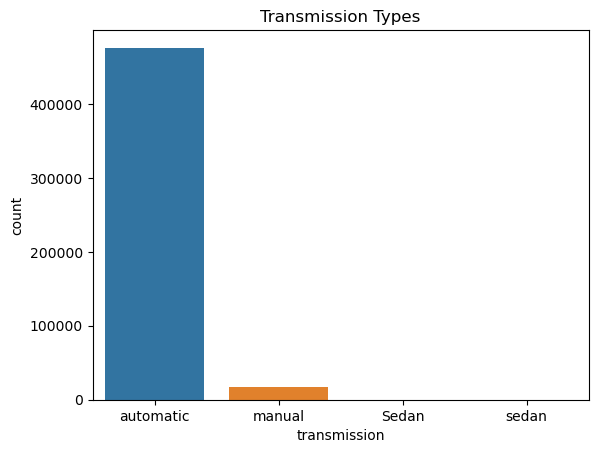

In [19]:
sns.countplot (x="transmission", data=car_prices_df)
plt.title("Transmission Types")
plt.show;

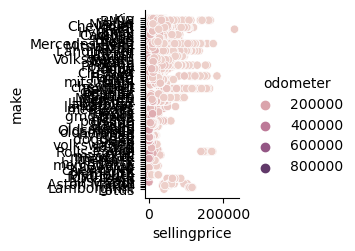

In [20]:
# Create a pairplot using the variables "make" using Seaborn
sns.pairplot(car_prices_df, x_vars=["sellingprice"], y_vars=["make"], hue="odometer", markers="o")
#Display the pairplot
plt.show()

#(need to fix plot for easir visibility)

### Preprocessing the Data

In [21]:
categorical_df = car_prices_df[['make', 'body','model','trim','transmission','state',
                       'color','interior','seller']]

In [22]:
cat_encoder = LabelEncoder()

In [23]:
for i in categorical_df.columns:
    if categorical_df[i].dtype =='object':
        categorical_df[i] = cat_encoder.fit_transform(categorical_df[i])

In [24]:
Create the VIF dataframe
vif_data = pd.DataFrame() 
vif_data["feature"] = cat_encoder.columns 

Calculate VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(cat_encoder.values, i) 
                   for i in range(len(cat_encoder.columns))] 

print(vif_data) -(encoder form sklearn)

SyntaxError: invalid syntax (1853259885.py, line 1)

In [ ]:
# Converting 'year' to categorical data type and creating 'year_codes'
car_prices_df['year'] = car_prices_df['year'].astype('category')

# Create a new column and assign numerical values to each category
car_prices_df['year_codes'] = car_prices_df['year'].cat.codes + 1

#car_prices_df['year'] = car_prices_df['year'].astype('category')

# Create a mapping between original 'year' values and numerical codes
#year_mapping = {year: code + 1 for code, year in enumerate(car_prices_df['year'].cat.categories)}

# Apply the mapping to create a new column 'year_codes'
#car_prices_df['year_codes'] = car_prices_df['year'].map(year_mapping)

In [ ]:
car_prices_df = car_prices_df.drop(columns=['vin','seller',], axis=1)
car_prices_df.dropna(inplace=True)

# Review the DataFrame
car_prices_df.head()

In [ ]:
make_pp= car_prices_df.make.value_counts()[:10]
make_pp.index


In [ ]:
tencar_df= car_prices_df[car_prices_df['make'].isin(make_pp.index)]

In [ ]:
tencar_df.make.value_counts() , tencar_df.shape

In [ ]:
tencar_df.isna().sum()

In [ ]:
tencar_df = tencar_df[['year','make','model','trim','transmission','state','condition','odometer','color','interior','mmr','sellingprice']]
   

In [ ]:
tencar_df.duplicated().sum()

In [ ]:
tencar_df.head()

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(tencar_df.corr(), annot=True, fmt='.2f', cmap='gist_heat', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.show()

In [ ]:
cat_encoder = LabelEncoder()

In [ ]:
for i in tencar_df.columns:
    if tencar_df[i].dtype =='object':
        tencar_df[i] = cat_encoder.fit_transform(tencar_df[i])

In [ ]:
tencar_df.head()

## Machine Learning 

#### Step 1: separate target and feature variables, Split DataFrame, Create Scaler 

In [ ]:
# Separate the y variable, the target
y = tencar_df["sellingprice"]

# Separate the X variable, the features
X = tencar_df.drop(columns="sellingprice")

In [ ]:
# Split the DataFrame using train_test_split
# Assign a random_state of 42 to the function
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

In [ ]:
xtrain.shape, ytrain.shape

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X= tencar_df.iloc[:,:-1]
y= tencar_df.iloc[:,-1]

In [ ]:
y

In [ ]:
for i in X.columns:
    X[i] = scaler.fit_transform(np.array(X[i]).reshape(-1,1))

In [ ]:
X

#### Lasso Regression

In [ ]:
lasso_model = Lasso(alpha=0.1)

In [ ]:
lasso_model.fit(xtrain,ytrain)

In [ ]:
pred=lasso_model.predict(xtest)

In [ ]:
msre = round(np.sqrt(mean_squared_error(ytest,pred)),2)
msre

In [ ]:
mean_squared_error(ytest,pred)

In [ ]:
lasso_model.coef_

In [ ]:
lasso_model.intercept_

In [ ]:
r2_score(ytest,pred)

In [ ]:
param = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100, 1000, 10000]}

In [ ]:
lasso_twocv= GridSearchCV(lasso_model, param, cv=3, n_jobs=1)

In [ ]:
lasso_twocv.fit(xtrain, ytrain)

In [ ]:
pred_two= lasso_twocv.predict(xtest)

In [ ]:
mean_absolute_error(ytest, pred_two)

In [ ]:
mean_squared_error(ytest, pred_two)

In [ ]:
r2_score(ytest, pred_two)

In [ ]:
lasso_twocv.best_estimator_

In [ ]:
lass_two = Lasso(alpha=10000)

In [ ]:
lass_two.fit(xtrain, ytrain)

In [ ]:
lass_two.intercept_

In [ ]:
lass_two.coef_

In [ ]:
coef_dict={}
for coef, feat in zip(lasso_model.coef_,X.columns):
    coef_dict[feat] = coef
coef_dict

In [ ]:
predict_lasso = lass_two.predict(xtest)

In [ ]:
coef_names = tencar_df.drop('sellingprice',axis=1).columns

print(coef_names)

In [ ]:
lasso = Lasso(alpha=100)
lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(coef_names)), lasso_coef)
plt.xticks(range(len(coef_names)), coef_names, rotation=90)
plt.ylabel("Coefficients")
plt.show()

#### Linear Regression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [ ]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("Mean Absolute Error of linear regression model is:", linreg_mae)
print("R2 score of linear regression model is:", linreg_r2)

In [ ]:
linreg_score = cross_val_score(linreg, X_test, y_test, cv=4)


In [ ]:
tencar_df.describe()

In [ ]:
# go back into preprocessing -normalize that data to remove skewness 

In [ ]:
residuals = y_train - y_test

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### Principal Component Analysis 

In [ ]:
## if we had more time things we could look into 
#which states had the best selling prices/
#which seller had the lowest/highest selling prices